In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Market_Basket_Optimisation.csv')
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Display the first few rows of the dataset
print(df.head())

# Check summary statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

           shrimp    almonds     avocado    vegetables mix green grapes  \
0         burgers  meatballs        eggs               NaN          NaN   
1         chutney        NaN         NaN               NaN          NaN   
2          turkey    avocado         NaN               NaN          NaN   
3   mineral water       milk  energy bar  whole wheat rice    green tea   
4  low fat yogurt        NaN         NaN               NaN          NaN   

  whole weat flour yams cottage cheese energy drink tomato juice  \
0              NaN  NaN            NaN          NaN          NaN   
1              NaN  NaN            NaN          NaN          NaN   
2              NaN  NaN            NaN          NaN          NaN   
3              NaN  NaN            NaN          NaN          NaN   
4              NaN  NaN            NaN          NaN          NaN   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0            NaN       NaN   NaN   NaN           NaN    NaN

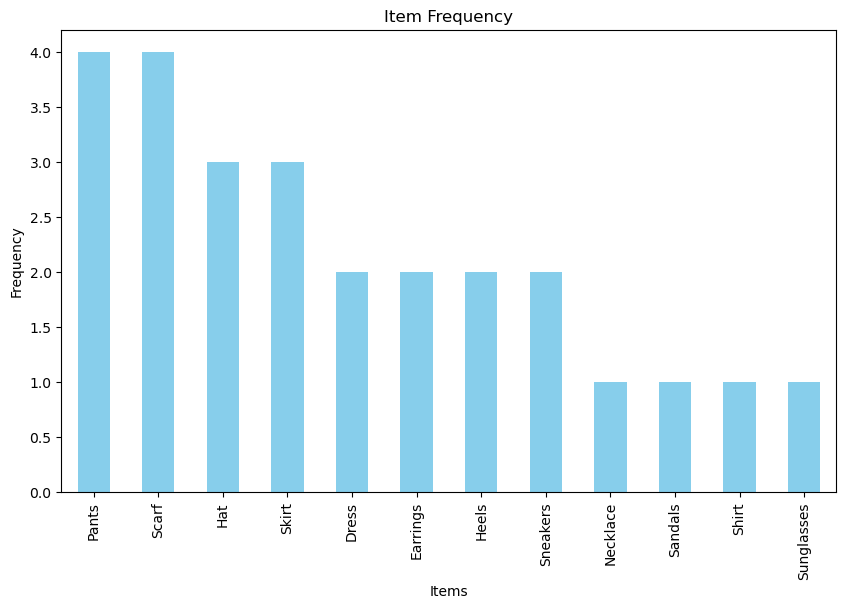

              antecedents                           consequents  support  \
0                 (Dress)                               (Heels)      0.4   
1                 (Heels)                               (Dress)      0.4   
2              (Necklace)                               (Dress)      0.2   
3               (Sandals)                               (Dress)      0.2   
4                 (Dress)                               (Scarf)      0.4   
..                    ...                                   ...      ...   
670       (Earrings, Hat)       (Necklace, Dress, Heels, Scarf)      0.2   
671       (Necklace, Hat)       (Earrings, Dress, Heels, Scarf)      0.2   
672  (Earrings, Necklace)            (Hat, Dress, Heels, Scarf)      0.2   
673     (Necklace, Scarf)         (Hat, Earrings, Dress, Heels)      0.2   
674            (Necklace)  (Hat, Dress, Heels, Earrings, Scarf)      0.2   

     confidence  
0           1.0  
1           1.0  
2           1.0  
3           1.0

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Dataset
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

# Step 1: Data Preprocessing
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 2: Visualization
item_counts = df.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Item Frequency')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# Step 3: Association Rule Mining
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Step 4: Generate Marketing Plans
marketing_plans = rules[['antecedents', 'consequents', 'support', 'confidence']]
print(marketing_plans)